# AutoRegression Model

# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Import AR module from statsmodels

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

## Load dataset and visualize

In [4]:
df = pd.read_csv(r'Dataset\uspopulation.csv', index_col='DATE', parse_dates=True)

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [6]:
df.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

In [7]:
df.index.freq ='MS'

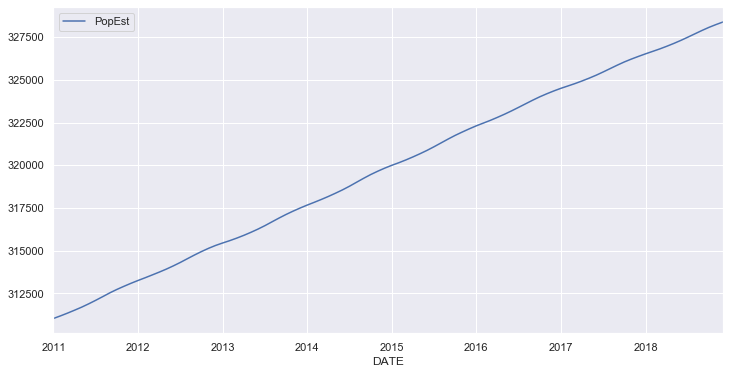

In [8]:
df.plot(figsize=(12,6))

In [9]:
df.shape

(96, 1)

## Split dataset to train test set

In [10]:
# to predict 12 month
train=df.iloc[:84]
test = df.iloc[84:]

## AR(1) Model

In [11]:
model = AR(train['PopEst']) 

In [12]:
AR1fit = model.fit(maxlag=1) # predict based on one data point earlier

In [13]:
AR1fit.k_ar

1

In [14]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [15]:
start = len(train)
end = len(train)+len(test) -1

In [21]:
pred = AR1fit.predict(start=start, end=end)
pred = pred.rename('AR(1) preidction')

<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [20]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


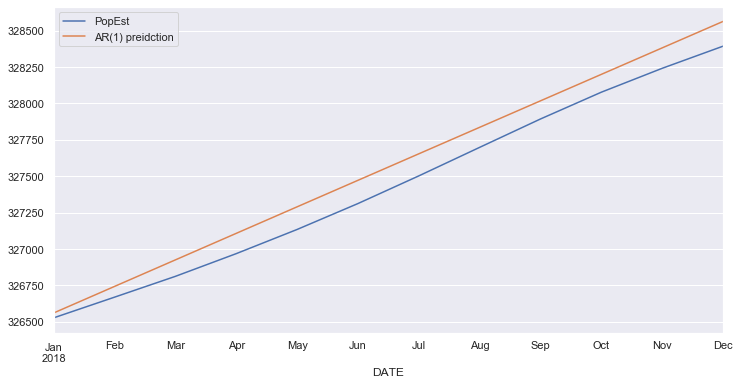

In [24]:
test.plot(figsize=(12,6), legend=True)
pred.plot(legend=True)

## AR(2) Model

In [26]:
model2 = AR(train['PopEst']) 
AR2fit = model2.fit(maxlag=2)

In [27]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [29]:
pred2 = AR2fit.predict(start=start, end=end)
pred2 = pred2.rename('AR(2) prediction')

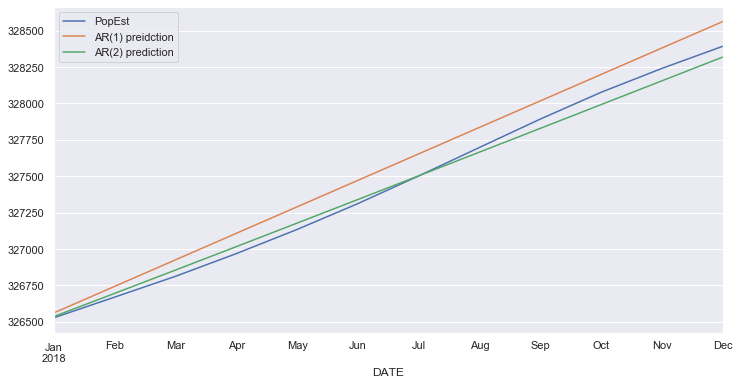

In [31]:
test.plot(figsize=(12,6), legend=True)
pred.plot(legend=True)
pred2.plot(legend=True)

How to get the order value?
## Fit an AR(p) model where statsmodels chooses p

In [32]:
model3 = AR(train['PopEst']) 
ARfit = model3.fit(ic='t-stat')

In [33]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [36]:
pred3 = ARfit.predict(start=start, end=end)
pred3 = pred3.rename('ARfit t-stat')

In [34]:
from sklearn.metrics import mean_squared_error

In [37]:
labels = ['AR1', 'AR2', 'AR8']

In [42]:
preds = [pred, pred2, pred3]

## Model Evaluation with MSE

In [45]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} MSE was {error}')

AR1 MSE was 17449.71423207106
AR2 MSE was 2713.258660776706
AR8 MSE was 186.97526915372725


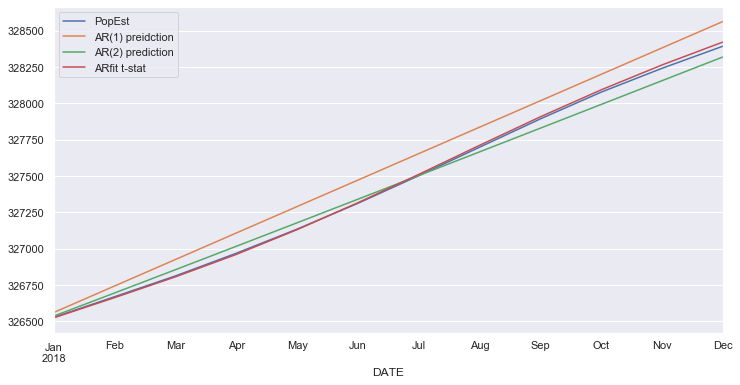

In [46]:
test.plot(figsize=(12,6), legend=True)
pred.plot(legend=True)
pred2.plot(legend=True)
pred3.plot(legend=True)

## Forecast Future

In [47]:
# Forecast future
model4 = AR(df['PopEst'])
ARfit2 = model4.fit()


In [48]:
ARfit2.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

In [49]:
forecasted = ARfit2.predict(len(df), len(df)+12).rename('Forecast values')

In [50]:
forecasted

2019-01-01    328537.420462
2019-02-01    328673.215488
2019-03-01    328810.443214
2019-04-01    328957.592922
2019-05-01    329117.335889
2019-06-01    329289.277205
2019-07-01    329470.144228
2019-08-01    329655.073585
2019-09-01    329839.482988
2019-10-01    330015.434964
2019-11-01    330175.676001
2019-12-01    330322.580199
2020-01-01    330459.617376
Freq: MS, Name: Forecast values, dtype: float64

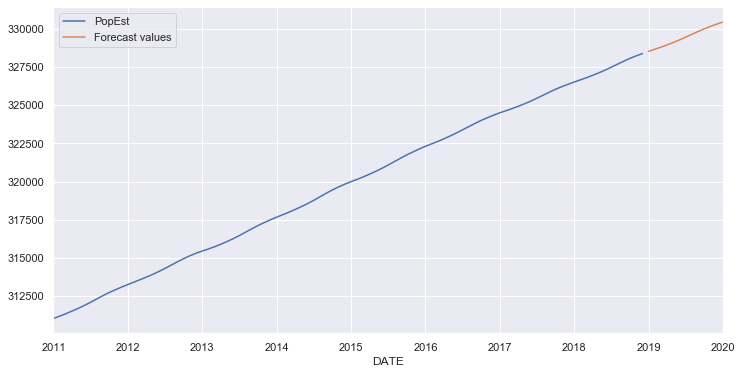

In [54]:
df['PopEst'].plot(figsize=(12,6),legend=True)
forecasted.plot(legend=True)